# Compute correlations and integral lengthscale

### Definition

The two point correlation $R_{ij}$ is defined as
$$ R_{ij}({\mathbf x},\boldsymbol{\xi}) = 
\frac{\langle {u'_i(\mathbf{x}, t) u'_j(\mathbf{x}+\boldsymbol{\xi},t)} \rangle}
{ \sqrt{\langle u'^2_i \rangle} \sqrt{\langle u'^2_j \rangle}} $$

The fluctuations
$$ u'_i(\mathbf{x},t) = u_i(\mathbf{x},t) - \langle u_i(\mathbf{x},t) \rangle $$

The lengthscale is calculated as
$$ L = \int_0^\infty R_{ij}(\xi)\: {\textrm d}\xi  $$

See https://spiral.imperial.ac.uk/bitstream/10044/1/41599/4/Airflow_v16a_Revised25_final_deposit.pdf as a reference

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)
for x in amrwindfedirs: sys.path.insert(1, x+'/utilities')    

import postproamrwindsample_xarray as ppsamplexr
import correlate as corr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amrdir = '/lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI/precursor6_7kmX2km_5m/post_processing/'
ncfile = 'samplePlane_100000.nc'  # netcdf filename

In [3]:
timerange=[25000, 25300]   # Average between these times
iplane=1
group='p_hub'

In [4]:
avgdat, headers = corr.avgNCplaneXR(amrdir+'/'+ncfile, timerange, group, iplane, verbose=True)

[============================================================] 100.0% 


In [5]:
iplane2=0
ij   = [0,0]
ws, winddir           = corr.getavgwind(avgdat, headers, iplane2)
print('WS   = '+repr(ws))
print('Wdir = '+repr(winddir))

WS   = [9.030070856520142, -0.00021254621740565948, -4.270966036309399e-05]
Wdir = 270.00134860527675


In [6]:
# Create the probe list for LONGITUDINAL
# Set parameters
winddir= 270
if (winddir>270): s=-1
else:             s=+1
startx = np.arange(100,300,25)
starty = np.arange(0,300,25)[::s]
probelength = 400 # Probe length should be a few hundred meters
startp = []
yoffset=0
[[startp.append([x,y+yoffset*iy,iplane2]) for x in startx] for iy, y in enumerate(starty)]

plistLONG = corr.makeprobeline(startp, winddir, probelength, avgdat)

Nlong      = len(plistLONG)
print("Len(plist)=%i"%Nlong)

Len(plist)=96


In [7]:
# Create the probe list for LATERAL
# Set parameters
winddir= 360
if (winddir>270): s=-1
else:             s=+1
startx = np.arange(100,300,25)
starty = np.arange(0,300,25)[::s]
probelength = 400 # Probe length should may be 0.5*domain length
startp = []
yoffset=0
[[startp.append([x,y+yoffset*iy,iplane2]) for x in startx] for iy, y in enumerate(starty)]

plistLAT = corr.makeprobeline(startp, winddir, probelength, avgdat)

Nlat     = len(plistLAT)
print("Len(plist)=%i"%Nlat)

Len(plist)=96


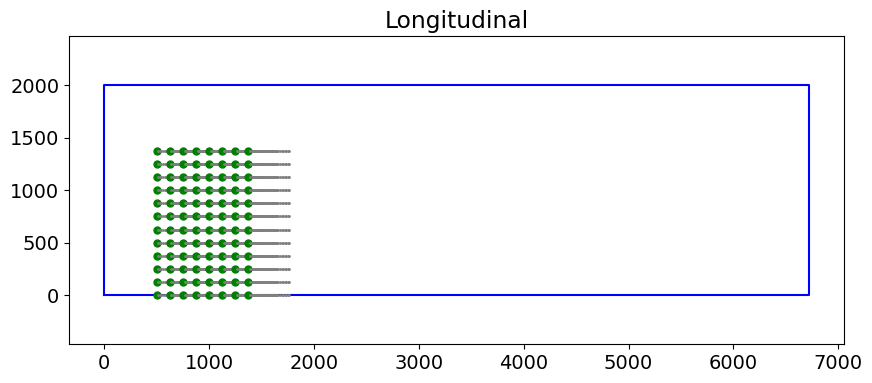

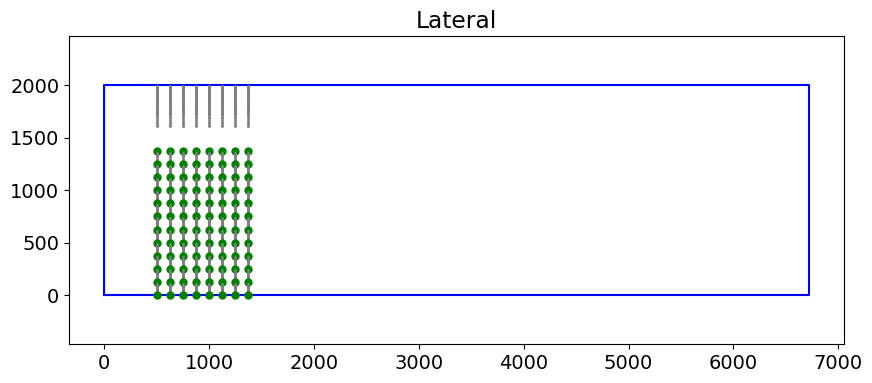

In [8]:
plotprobept = True
# Plot the probe points
if plotprobept:
    #avgdat, headers       = corr.loadavg(ncfilename, loadfromplanes, avgsavefile, verbose=True)
    # LONG
    plt.figure(figsize=(10,4))
    plt.rc('font', size=14)
    corr.plotprobes(plistLONG, avgdat, headers, verbose=False, skip=3)
    plt.title('Longitudinal')
    plt.axis('equal')
    # LAT
    plt.figure(figsize=(10,4))
    plt.rc('font', size=14)
    corr.plotprobes(plistLAT, avgdat, headers, verbose=False, skip=3)
    plt.title('Lateral')
    plt.axis('equal')

In [9]:
plist        = plistLONG + plistLAT
allf, allRij = corr.makeRij(ij, plist, [], True, None, iplane, group,
                            avgdat = avgdat, headers=headers, timerange=timerange, ncfilename=amrdir+'/'+ncfile, verbose=True)

In [10]:
# Split it back into LONG/LAT
avgRijLong   = np.mean(allRij[:Nlong], axis=0)
avgRijLat    = np.mean(allRij[Nlong:], axis=0)

Text(0.5, 0, '$\\xi$ [m]')

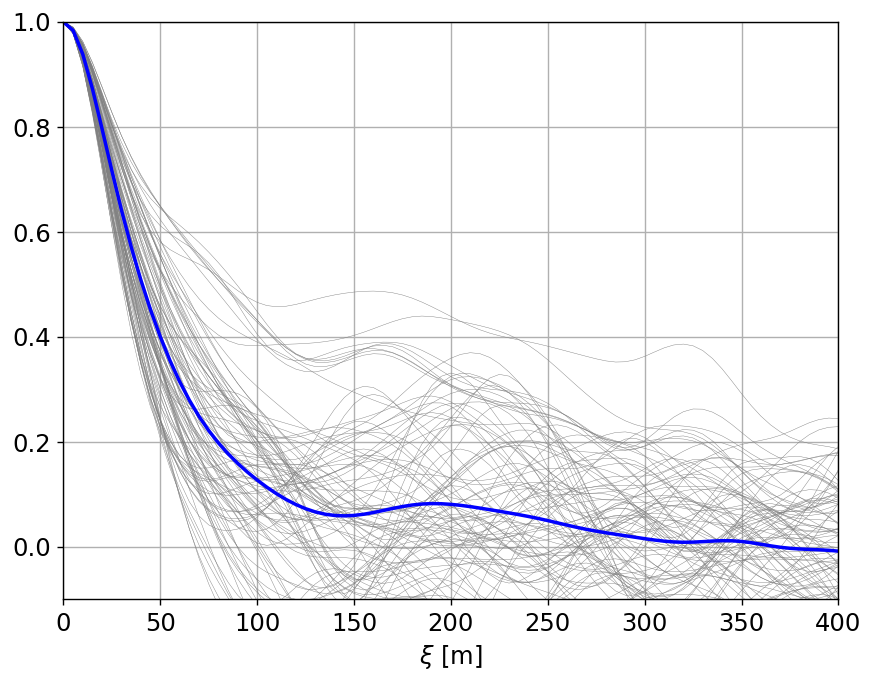

In [15]:
# Plot the LONG Rij
plt.figure(figsize=(8,6), dpi=125)
#plt.rc('font', size=14)

for ir, Rij in  enumerate(allRij[:Nlong]):
    plt.plot(allf[Nlong], Rij, 'gray', lw=0.25)
# Average
plt.plot(allf[Nlong], avgRijLong, 'b', lw=2)
plt.ylim([-0.1, 1])
plt.xlim([0, probelength])
plt.grid()
plt.xlabel(r'$\xi$ [m]')

Text(0.5, 0, '$\\xi$ [m]')

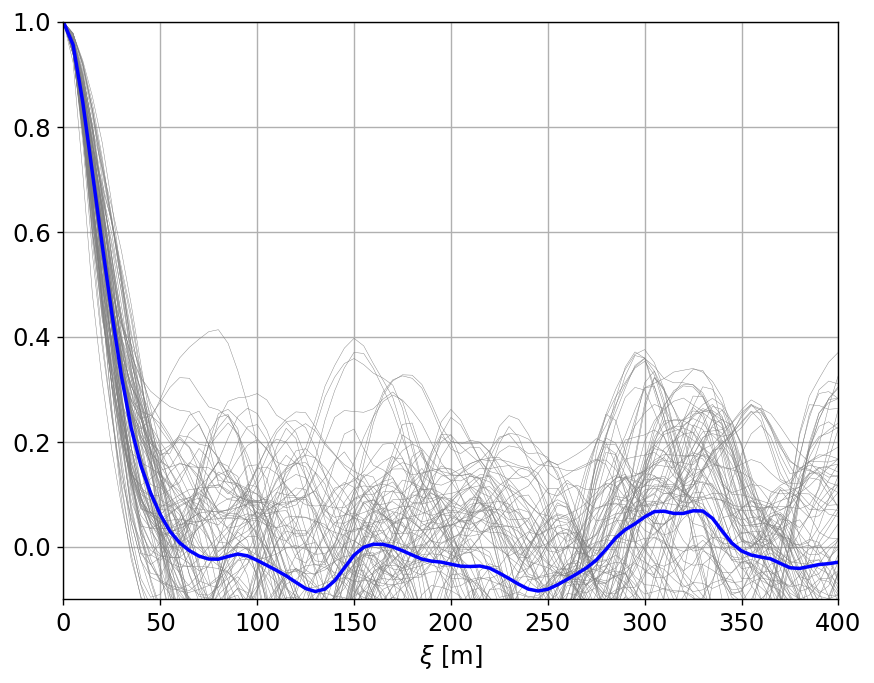

In [16]:
# Plot the LAT Rij
plt.figure(figsize=(8,6), dpi=125)
#plt.rc('font', size=14)

for ir, Rij in  enumerate(allRij[Nlong:]):
    plt.plot(allf[Nlong], Rij, 'gray', lw=0.25)
# Average
plt.plot(allf[Nlong], avgRijLat, 'b', lw=2)
plt.ylim([-0.1, 1])
plt.xlim([0, probelength])
plt.grid()
plt.xlabel(r'$\xi$ [m]')

In [13]:
# Calculate lengthscale
lengthscale = corr.calclengthscale(allf[0], avgRijLong)
print('LONG lengthscale = %f'%lengthscale)
lengthscale = corr.calclengthscale(allf[Nlong], avgRijLat)
print('LAT lengthscale  = %f'%lengthscale)

LONG lengthscale = 60.979392
LAT lengthscale  = 24.695610
